<a href="https://colab.research.google.com/github/aaronmj7/Assignment-3-LLM/blob/main/Assignment_3_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3 - Large language models**

In [ ]:
# Install necessary libraries
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found 

In [ ]:
# Import necessary libraries
from datasets import load_dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import AutoTokenizer

## Load Data

In [ ]:
# Load dataset
raw_ds = load_dataset("OxAISH-AL-LLM/wiki_toxic")

In [ ]:
raw_ds

DatasetDict({
    train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 127656
    })
    validation: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 31915
    })
    test: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 63978
    })
    balanced_train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 25868
    })
})

In [ ]:
raw_ds["train"].features

{'id': Value(dtype='string', id=None),
 'comment_text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['non', 'tox'], id=None)}

In [ ]:
label_names = raw_ds["train"].features['label'].names
label_names

['non', 'tox']

In [ ]:
raw_ds["train"][0]

{'id': '794c30aff0931384',
 'comment_text': "And that's not a personal attack^^ ?",
 'label': 0}

In [ ]:
ds = raw_ds["balanced_train"]
ds

Dataset({
    features: ['id', 'comment_text', 'label'],
    num_rows: 25868
})

In [ ]:
ds[:5]

{'id': ['653b15d1deea659e',
  '57c5f0e88e9e5219',
  'e78a6eb06dbddd9a',
  '435008cc6f750098',
  '2c60f0fc97d86718'],
 'comment_text': ['"\nNot if I can help it. Mudslide is more like it....127 "',
  'Footnotes/references\nOk. I have no objection',
  '.\nI am a loser and I need your help to get a life',
  '"\nI think I\'ve decided that I have no strong opinion. As long as the style doesn\'t have any of the old problems, it doesn\'t matter to me if it\'s substed or transcluded. Just no metadata, no hide/show, and no junk links. -  (conspire | past ops) "',
  'Quite frankly nothing is helping due to his arrogance and truculence. He keeps getting called a dick as he is acting like one, over and over. In my view that makes him one. Thank you for posting my comment over to the IB. Incidentally, what makes you think a block will cure anything?'],
 'label': [0, 0, 0, 0, 1]}

## EDA

In [ ]:
# Convert dataset to DataFrame
ds.set_format("pandas")
df = ds[:]

# Reset dataset format
ds.reset_format()

# Display first few rows
df.head()

,id,comment_text,label
0,653b15d1deea659e,"""\nNot if I can help it. Mudslide is more like...",0
1,57c5f0e88e9e5219,Footnotes/references\nOk. I have no objection,0
2,e78a6eb06dbddd9a,.\nI am a loser and I need your help to get a ...,0
3,435008cc6f750098,"""\nI think I've decided that I have no strong ...",0
4,2c60f0fc97d86718,Quite frankly nothing is helping due to his ar...,1


In [ ]:
try:
    df.drop(columns=['id'], inplace=True)
except KeyError:
    pass
df.head()

,comment_text,label
0,"""\nNot if I can help it. Mudslide is more like...",0
1,Footnotes/references\nOk. I have no objection,0
2,.\nI am a loser and I need your help to get a ...,0
3,"""\nI think I've decided that I have no strong ...",0
4,Quite frankly nothing is helping due to his ar...,1


label
0    12934
1    12934
Name: count, dtype: int64


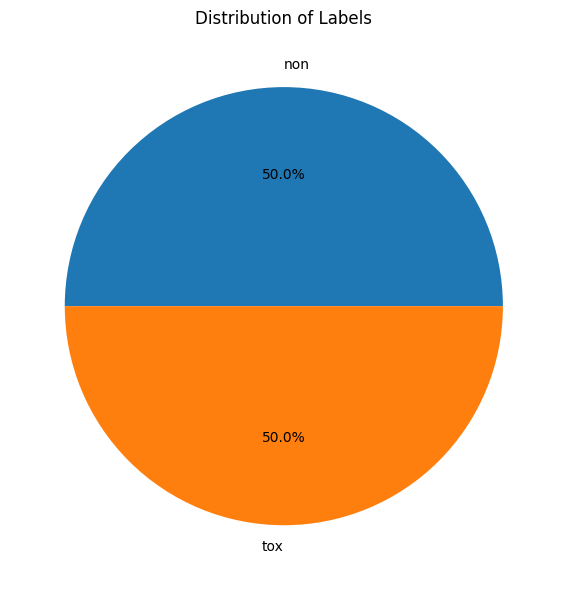

In [ ]:
# Calculate the proportions of each label
label_counts = df['label'].value_counts()
sizes = label_counts.values.tolist()
print(label_counts)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=label_names, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.tight_layout()
plt.show()

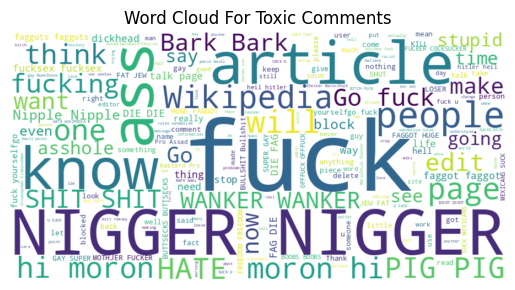

In [ ]:
from wordcloud import WordCloud

toxic_comments = ''.join(df[df['label'] == 1]['comment_text'])
toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Toxic Comments")
plt.show()

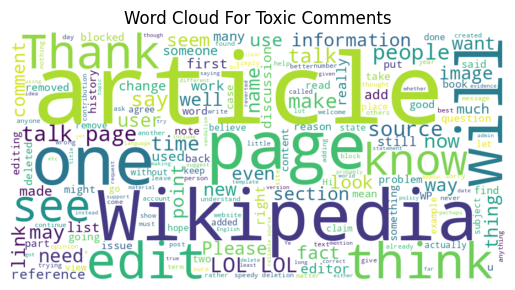

In [ ]:
toxic_comments = ''.join(df[df['label'] == 0]['comment_text'])
toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Toxic Comments")
plt.show()

## Pre-processing

In [ ]:
# Set model checkpoint
model_checkpoint = "distilbert-base-uncased"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Check if it is a fast tokenizer
tokenizer.is_fast

True

In [ ]:
# Tokenize a comment
inputs = tokenizer(ds[0]['comment_text'])
inputs

{'input_ids': [101, 1000, 2025, 2065, 1045, 2064, 2393, 2009, 1012, 8494, 14540, 5178, 2003, 2062, 2066, 2009, 1012, 1012, 1012, 1012, 13029, 1000, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
print(tokenizer.convert_ids_to_tokens(inputs["input_ids"]))
print(ds[0]['comment_text'])

['[CLS]', '"', 'not', 'if', 'i', 'can', 'help', 'it', '.', 'mud', '##sl', '##ide', 'is', 'more', 'like', 'it', '.', '.', '.', '.', '127', '"', '[SEP]']
"
Not if I can help it. Mudslide is more like it....127 "


turnacate, plot for size of each comment

padding true or data collator

## Model

In [ ]:
from transformers import TFAutoModelForSequenceClassification
model_checkpoint = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)